### Processamento Digital de Imagens - Filtros, equalização e limiarização

* Em PDI, podemos utilizar filtros para destacar ou suavizar partes da imagem.
* Estes filtros, assim como as demais operações vistas até então, são operações matemáticas realizadas na matriz da imagem
* Na imagem, podemos ter diversos tipos de informações dependendo da região, sendo assim, os filtros comumente são aplicados localmente na imagem por meio de um conceito conhecido como **janela deslizante**.
  * Dada uma região de pixels da imagem (uma submatriz da imagem representada pelo quadrado verde)
  * O filtro é aplicado nesta região 
  * Em seguida, a submatriz é deslocada/transladada para a região seguinte da imagem, fazendo a aplicação do filtro naquela mesma região
  * Esse processo é repetido até o final da imagem

![Title](../imgs/sliding_window_example.gif)

#### Vamos entender matematicamente?

***Convolução***

No processamento de imagens, o kernel de convolução é uma matriz 2D que é utilizada para a aplicação de filtros em imagens. Esses kernels também são conhecidos como matriz de convolução, usualmente essa matrizes são quadradas, *MxN*, onde tanto o *M como o N* são números ímpares (3x3, 5x5, 7x7, etc). Um exemplo de matriz 3x3 é como a demonstrada abaixo:

$M = \begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}$

Esses kernels podem ser utilizados para alcançar um efeito desejado:
- Blurring
- Sharpening

- Reduz algum tipo de ruído na imagem. Por este motivo, *blurring* também é conhecido como suavização (*smoothing*).
- Para aumentar o foco da imagem para uma porção específica e reduzir a informação do *background,* como feito em algumas cameras de smartphones no modo “retrato”.

Aplicando o seguinte filtro:

 $M = \begin{bmatrix}
1 & 0 & -1\\
1 & 0 & -1 \\
1 & 0 & -1
\end{bmatrix}$


![Title](../imgs/conv.png)

Aplicando o seguinte filtro:

 $M = \begin{bmatrix}
1 & 0 & 1\\
0 & 1 & 0 \\
1 & 0 & 1
\end{bmatrix}$

![https://miro.medium.com/max/658/0*jLoqqFsO-52KHTn9.gif](https://miro.medium.com/max/658/0*jLoqqFsO-52KHTn9.gif)

Perceba que o tamanho da imagem convoluída é menor que a original.

Portanto, em geral, utilizamos uma técnica conhecida como *zero-padding*, adicionando uma camada de zeros ao redor da imagem, e dessa forma preservando o tamanho da imagem original, antes da convolução.

![https://deeplizard.com/assets/jpg/2b25a0c1.jpg](https://deeplizard.com/assets/jpg/2b25a0c1.jpg)

#### Vamos entender como funciona no python 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [41]:
import requests
lago_url = "https://images.unsplash.com/photo-1516132006923-6cf348e5dee2?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1374&q=80"

# Fazendo o download da imagem lago_url
img_data = requests.get(url=lago_url).content
# Salvando a imagem no diretório local, com o nome `lago.png`
with open("lago.png", 'wb') as handler:
    handler.write(img_data)

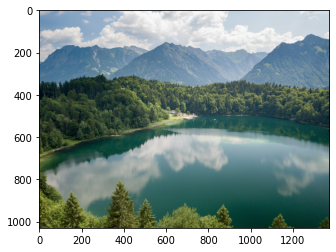

In [42]:
lago = cv2.imread("lago.png")
plt.imshow(cv2.cvtColor(lago, cv2.COLOR_BGR2RGB))

In [43]:
# Separando os canais BGR em arrays
lago_b, lago_g, lago_r = cv2.split(lago)
print(lago_b.shape)

(1030, 1374)


In [44]:
# Selecionando um quadrado 3x3 do canal azul
subset = lago_b[0:3, 0:3]
print(subset)

[[195 195 196]
 [194 195 196]
 [194 195 196]]


In [45]:
# aplicando convolução no subset da imagem
kernel = np.asarray([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])
print(np.multiply(subset, kernel))
convolved = np.sum(np.multiply(subset, kernel))
print(convolved)

[[  0   0   0]
 [  0 195   0]
 [  0   0   0]]
195


### Utilização no OpenCV

#### Filtros de suavização

O blur aplica uma suavização do pixel central em relação a sua vizinhança.

Um dos métodos de suavização é o filtro médio, que pode ser representado como:

$M = \frac{1}{9}\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}$

In [46]:
img = cv2.imread('../imgs/cat.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

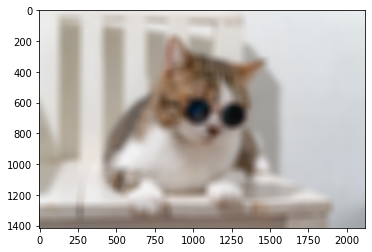

In [47]:
img_blur = cv2.blur(img,(55,55))
plt.imshow(img_blur);

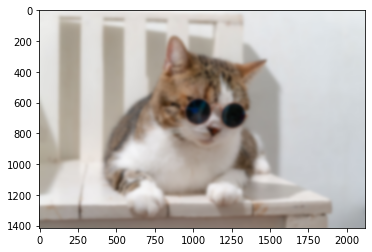

In [48]:
blur = cv2.GaussianBlur(img,(55,55),0)
plt.imshow(blur);

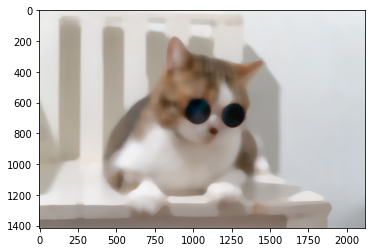

In [49]:
median = cv2.medianBlur(img,55)
plt.imshow(median);

**Detecção de bordas**

- Uma das técnicas mais importantes no processamento de imagem;
- Uma das features mais importantes associadas a uma imagem;

Bordas são caracterizadas por uma mudança repentina na intensidade do pixel.

Verificamos a mudança de um pixel alvo em relação a sua vizinhança, se houver uma mudança repentina na intensidade do pixel, pode ser considerada uma possível borda.


A deteção de bordas é uma técnica de processamento de imagem, que é utilizada para identificar as bordas de objetos, ou regiões dentro de uma imagem. Bordas são uma das features mais importantes associadas a uma imagem. Nós podemos identificar a estrutura de uma imagem através das bordas. Sendo que em pipelines de visão computacional a deteção de bordas é amplamente aplicada.


Uma mudança repentina de intensidade está representada abaixo:

![https://learnopencv.com/wp-content/uploads/2021/06/pixel_intensity.png](https://learnopencv.com/wp-content/uploads/2021/06/pixel_intensity.png)

Esse aumento repentino fica mais evidente ao plotarmos a derivada de primeira ordem da função de intensidade

![https://learnopencv.com/wp-content/uploads/2021/06/first_derivative.png](https://learnopencv.com/wp-content/uploads/2021/06/first_derivative.png)


Para a detecção de bordas de Sobel, temos os seguintes kernels:

$SobelX = \begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}$, para a direção X

$SobelY = \begin{bmatrix}
1 & 2 & 1\\
0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}$, para a direção Y

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


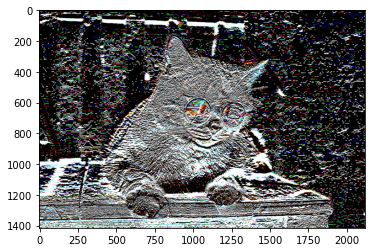

In [50]:
### Sobel X

sobel_x = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5) #cv2.CV_64F
plt.imshow(sobel_x, cmap='gray');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


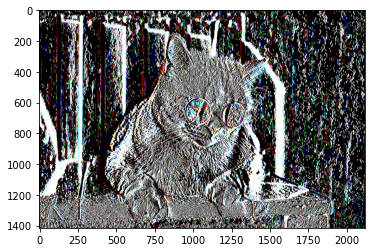

In [51]:
### Sobel em y 
sobel_y = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(sobel_y,cmap='gray');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


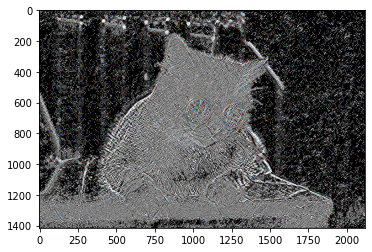

In [52]:
sobel_xy = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)
plt.imshow(sobel_xy,cmap='gray');

### Canny
 
* Filtro de detecção de bordas baseado no gradiente
* Possui dois thresholds (mínimo e máximo) que auxiliam a identificar o que realmente é borda ou ruído na imagem

leitura sobre o canny https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

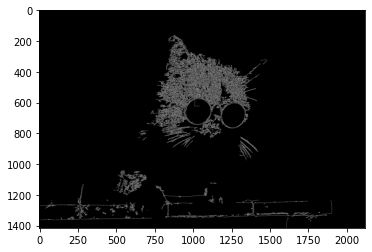

In [77]:
### Canny

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 50, 250)
plt.imshow(edged,cmap='gray');

#### Criando seu próprio filtro no OpenCV

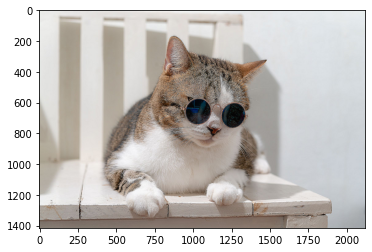

In [54]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen_img = cv2.filter2D(img, -1, kernel)
plt.imshow(sharpen_img);

**Limiarização global**

A limiriarização global, nessa técnica aplicamos um limiar (threshold) para cada pixel. Caso o valor seja menor do que o limiar tornamos o valor 0, caso contrário utilizaremos o valor máximo (255, por exemplo).

Por exemplo, no histograma abaixo, todos os pixels abaixo do limiar (T) serão ajustados para 0, enquanto valores acima do limiar T serão atribuídos com um valor pré-determinado (255, p.ex.). Uma das vantagens é a redução de ruído na imagem, ou para evidenciar alguma característica na imagem. 

![Fig](https://s3-sa-east-1.amazonaws.com/lcpi/c47082ad-acd2-4f33-9167-c478667caf1b.png)

Leitura extra: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

Text(0, 0.5, 'Número de pixel')

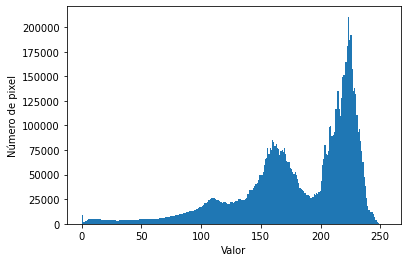

In [55]:
plt.hist(img.ravel(),256)
plt.xlabel('Valor')
plt.ylabel('Número de pixel')

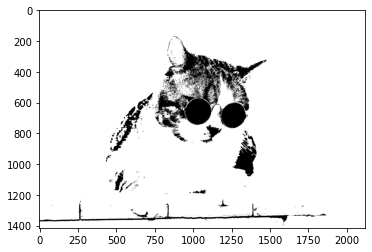

In [56]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret1,th1 = cv2.threshold(gray,
                         100,  # Limiar
                         255,  # Valores acima do limiar serão esse valor
                         cv2.THRESH_BINARY # Tipo de limiar, neste caso binário
                    )
plt.imshow(th1,cmap='gray')

#### Cada binarização tem seu efeito na imagem
![Fig](https://s3-sa-east-1.amazonaws.com/lcpi/fcf2aa7b-650b-420b-9fce-e0703850d0ba.png)

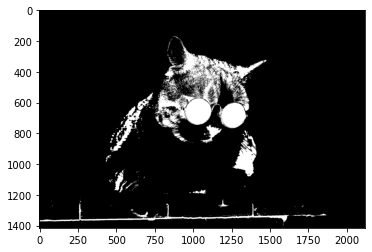

In [57]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret1,th1 = cv2.threshold(gray,
                         100,  # Limiar
                         255,  # Valores abaixo do limiar serão esse valor
                         cv2.THRESH_BINARY_INV # Tipo de limiar, neste caso binário
                    )
plt.imshow(th1,cmap='gray')

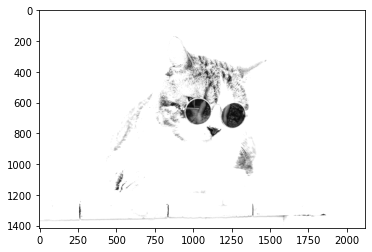

In [58]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret1,th1 = cv2.threshold(gray,
                         100,  # Limiar
                         255,  # Valores abaixo do limiar serão esse valor
                         cv2.THRESH_TRUNC # Tipo de limiar, neste caso binário
                    )
plt.imshow(th1,cmap='gray')

### Threshold adaptativo

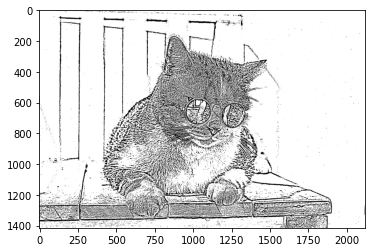

In [59]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th1 = cv2.adaptiveThreshold(gray,
                    255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                    cv2.THRESH_BINARY,11,2
                    )
plt.imshow(th1,cmap='gray')

### Otsu's 

In [60]:
img = cv2.imread('../imgs/moedas.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

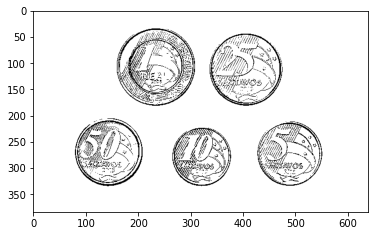

In [61]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret2,th1 = cv2.threshold(gray,100,200,cv2.THRESH_BINARY)
plt.imshow(th1,cmap='gray')

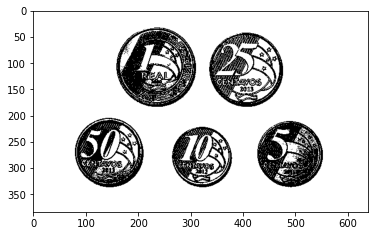

In [62]:
ret1,th1 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th1,cmap='gray')

### Combinando filtros

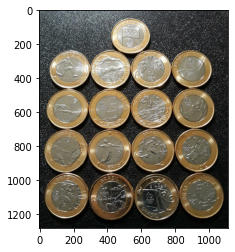

In [78]:
img_3 = cv2.imread('../imgs/moedas_noise.webp')
img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB)
plt.imshow(img_3,cmap='gray')

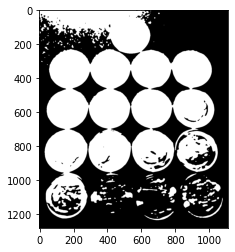

In [82]:
gray = cv2.cvtColor(img_3,cv2.COLOR_BGR2GRAY)
blur = cv2.blur(gray, (5, 5),0)
blur = cv2.GaussianBlur(gray,(21,21),0)
ret1,th1 = cv2.threshold(blur,100,200,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th1,cmap='gray')

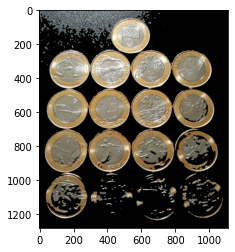

In [80]:
masked = cv2.bitwise_and(img_3, img_3, mask=th1)
plt.imshow(masked,cmap='gray')

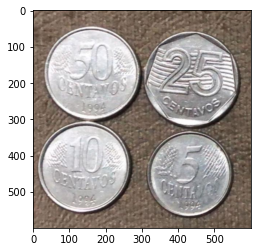

In [66]:
img_4 = cv2.imread('../imgs/moedas_reais.jpeg')
img_4 = cv2.cvtColor(img_4, cv2.COLOR_BGR2RGB)
plt.imshow(img_4)

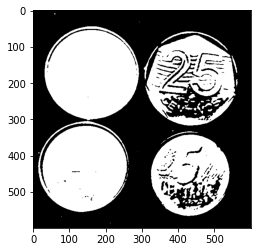

In [67]:
gray = cv2.cvtColor(img_4,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
ret1,th1 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th1,cmap='gray')

In [68]:
img = cv2.imread('../imgs/cat.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#### Equalização do histograma

* Podemos tornar uma imagem mais uniforme por meio do seu histograma
* Modifica a imagem de acordo com a distribuição do pixel

![https://docs.opencv.org/4.x/histogram_equalization.png](https://docs.opencv.org/4.x/histogram_equalization.png)

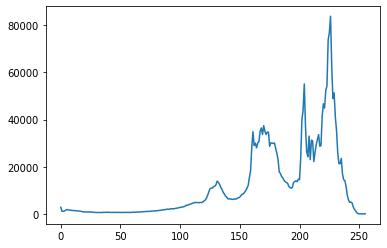

In [69]:
### Equalização

histr = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(histr)
plt.show()

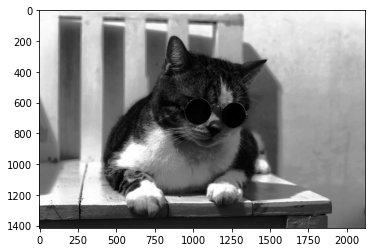

In [70]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_eq = cv2.equalizeHist(img_gray)
plt.imshow(img_eq, cmap='gray');

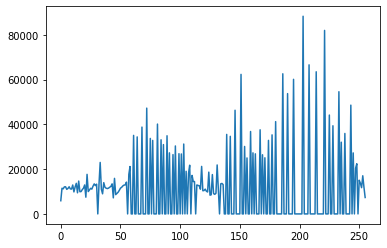

In [71]:
### Equalização

histr = cv2.calcHist([img_eq], [0], None, [256], [0,256])
plt.plot(histr)
plt.show()

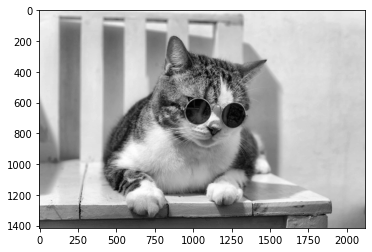

In [72]:
clahe = cv2.createCLAHE(clipLimit= 2.0,tileGridSize=(5,5))
cl1 = clahe.apply(img_gray)
plt.imshow(cl1, cmap='gray')

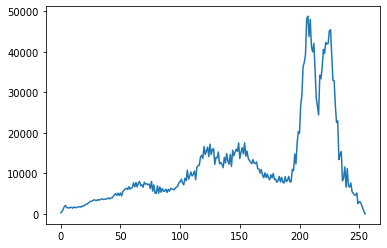

In [73]:
### Equalização

histr = cv2.calcHist([cl1], [0], None, [256], [0,256])
plt.plot(histr)
plt.show()

### Exercícios

* Uma das aplicações de PDI é a extração de texto em imagem por meio do OCR.
* Existem diversas bibliotecas para fazer isso, uma delas é a Tesseract.
* Embora o algoritmo seja eficiente para identificação de caracteres, temos inúmeras falhas dependendo da imagem
  * A presença de ruídos, sombras, falta de alinhamento, background, entre outras coisas pode prejudicar a leitura do OCR
 
Sendo assim, neste exercício, iremos tentar melhorar uma imagem de placa de carro de forma que possamos ler as informações presentes nesta placa
* Quais filtros ou técnicas de préprocessamento foram necessárias para identificação correta?
* Bônus: escolha uma outra imagem de placa de carro e teste seu algoritmo. Os mesmos filtros retornam mesmo resultado para esta imagem? Em caso negativo, o que você acredita que essa imagem tem de diferente que pode estar prejudicando a performance do tesseract? Tente alterar o pré-processamento e veja o desempenho novamente do algoritmo

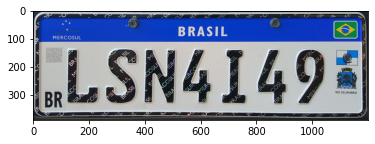

In [6]:
img_2 = cv2.imread('../imgs/placa.jpeg')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_2)

Para instalar o OCR: 

* baixe os binários do tesseract disponíveis aqui https://github.com/tesseract-ocr/tessdoc
* Rode o comando abaixo para instalar o pytesseract

Alguns tutoriais de instalação e uso do tesseract:

https://nanonets.com/blog/ocr-with-tesseract/

https://www.projectpro.io/article/how-to-train-tesseract-ocr-python/561

!pip install pytesseract

In [7]:
import pytesseract

In [12]:
#options = "--psm 11"
#text = pytesseract.image_to_string(img_2, config=options)

import cv2 
import pytesseract

img_placa = cv2.imread('../imgs/placa.jpeg')

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img_placa, config=custom_config)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [ ]:
text